# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

# Q1

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

***Q1.1*** 

A model is linear if it assumes a linear relationship between the independent and dependent variables. It is linear in the parameters, which means that the model can be written in a linear fashion.

***Q1.2*** 

The coefficient for a dummy variable represents the difference between the expected value of y when the category is presents vs the baseline category where the variables are held constant. 

if there is an intercept, one catergory is left out as a reference category and its effect is seen in the intercept

if there is not an intercept in the model, all the dummy variables are included but the coefficient's interpretation will change because each coefficient will represent the absolute mean of y for that category

***Q1.3*** 
linear regression can be used, but its not the best choice, because it produces a continuous value instead of probabilities, it assumes a linear relationship which might not be the base, especially for classification which can require decision boundaries that might not be linear. Also linear regressions are sensitive to outliers which can skew the data. 

***Q1.4*** 
Overfitting signs
- if there is high training accuracy and low test accuracy. This means that the model is only trained for the training data, and can't be applied for general use
- if small changes in data lead to large coefficient variations
- large coefficients means the model is trying to fit noise in data
- adjusted R^2 is lower than R^2, means too many predictors                                                                                                                                             

***Q1.5*** 
multicollinearity is when two or more independent variables are highly correlated, making it hard to see there independent effects on y. 

Two-stage Least squares is used to deal with this:
- step 1: regress the problematic variable on some variables that are related to the predictor but not directly affecting the outcome
- step 2: Use the values from step 1 in the main regression instead
- this isolates the effects of the variable

***Q1.6*** 
1. polynomial features, can capture curves for a model that does not align well to linear regression
2. logs can linearize exponentials
3. GAMS smooth non linear functions to variables instead
4. machine learning models

***Q1.7*** 
intercept: y when all predictors are 0
slope coefficent: change in y for 1 unit increase in predictor
dummy coefficent: difference in y between that category adn reference category



# Q8

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

In [8]:
import pandas as pd

df = pd.read_csv("data/divorce.csv")  # Adjust filename if different
print(df.head())
print(df.info())


  Atr1;Atr2;Atr3;Atr4;Atr5;Atr6;Atr7;Atr8;Atr9;Atr10;Atr11;Atr12;Atr13;Atr14;Atr15;Atr16;Atr17;Atr18;Atr19;Atr20;Atr21;Atr22;Atr23;Atr24;Atr25;Atr26;Atr27;Atr28;Atr29;Atr30;Atr31;Atr32;Atr33;Atr34;Atr35;Atr36;Atr37;Atr38;Atr39;Atr40;Atr41;Atr42;Atr43;Atr44;Atr45;Atr46;Atr47;Atr48;Atr49;Atr50;Atr51;Atr52;Atr53;Atr54;Class
0  2;2;4;1;0;0;0;0;0;0;1;0;1;1;0;1;0;0;0;1;0;0;0;...                                                                                                                                                                                                                                                                              
1  4;4;4;4;4;0;0;4;4;4;4;3;4;0;4;4;4;4;3;2;1;1;0;...                                                                                                                                                                                                                                                                              
2  2;2;2;2;1;3;2;1;1;2;3;4;2;3;

In [11]:
import pandas as pd

# Load the dataset using the correct delimiter
df = pd.read_csv("data/divorce.csv", sep=";")

# List of survey questions (shortened versions)
survey_questions = [
    "Apologizes prevent escalation",
    "Can ignore differences",
    "Can restart discussions",
    "Can reconnect after arguing",
    "Time together is special",
    "No time as partners",
    "Like strangers at home",
    "Enjoy holidays together",
    "Enjoy traveling together",
    "Common goals",
    "See future harmony",
    "Similar values: freedom",
    "Similar entertainment",
    "Common social goals",
    "Similar life dreams",
    "Compatible views on love",
    "Agree on happiness",
    "Agree on marriage",
    "Agree on roles in marriage",
    "Similar values: trust",
    "Know spouse's likes",
    "Know how to care when sick",
    "Know favorite food",
    "Know spouse's stress",
    "Know inner world",
    "Know basic concerns",
    "Know stress sources",
    "Know hopes and wishes",
    "Know spouse well",
    "Know friends and social life",
    "Feel aggressive in arguments",
    "Use specific phrases",
    "Use negative personality statements",
    "Use offensive expressions",
    "Insult during discussions",
    "Can be humiliating in arguments",
    "Arguments aren't calm",
    "Hate spouse's approach",
    "Fights occur suddenly",
    "Fight starts unexpectedly",
    "Lose calm quickly",
    "Shut down in arguments",
    "Try to calm environment",
    "Think about leaving home",
    "Prefer silence over arguing",
    "Avoid upsetting spouse",
    "Stay silent to control anger",
    "Feel right in discussions",
    "Disagree with accusations",
    "Not guilty for accusations",
    "Not wrong about home issues",
    "No hesitation pointing out inadequacies",
    "Remind spouse of inadequacies",
    "Not afraid to mention incompetence"
]

# Add final column name
new_columns = survey_questions + ["Status"]
df.columns = new_columns

# View the first few rows
df.head()


,Apologizes prevent escalation,Can ignore differences,Can restart discussions,Can reconnect after arguing,Time together is special,No time as partners,Like strangers at home,Enjoy holidays together,Enjoy traveling together,Common goals,...,Avoid upsetting spouse,Stay silent to control anger,Feel right in discussions,Disagree with accusations,Not guilty for accusations,Not wrong about home issues,No hesitation pointing out inadequacies,Remind spouse of inadequacies,Not afraid to mention incompetence,Status
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [12]:
print(df.isnull().sum())

Apologizes prevent escalation              0
Can ignore differences                     0
Can restart discussions                    0
Can reconnect after arguing                0
Time together is special                   0
No time as partners                        0
Like strangers at home                     0
Enjoy holidays together                    0
Enjoy traveling together                   0
Common goals                               0
See future harmony                         0
Similar values: freedom                    0
Similar entertainment                      0
Common social goals                        0
Similar life dreams                        0
Compatible views on love                   0
Agree on happiness                         0
Agree on marriage                          0
Agree on roles in marriage                 0
Similar values: trust                      0
Know spouse's likes                        0
Know how to care when sick                 0
Know favor

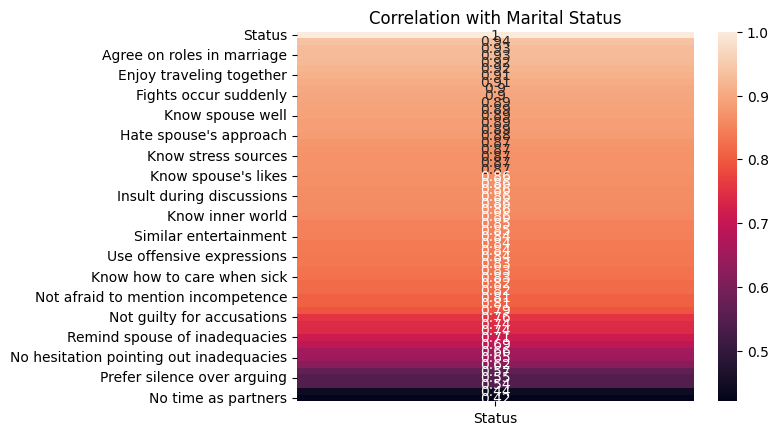

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr[["Status"]].sort_values(by="Status", ascending=False), annot=True)
plt.title("Correlation with Marital Status")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Status")
y = df["Status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

sse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sse = ((y_test - y_pred) ** 2).sum()
    sse_results[name] = sse
    print(f"{name} Regression SSE: {sse:.4f}")


Linear Regression SSE: 0.8105
Ridge Regression SSE: 0.7162
Lasso Regression SSE: 0.5322


I tested three regression models and calculated the Sum of Squared Errors.The Lasso Regression model had the lowest SSE (0.5322), indicating the best performance. Lasso works well here because:

It performs feature selection by shrinking less important coefficients to zero.
This is helpful when we have many (potentially redundant) predictors, as is the case here with 54 questions. Lasso was particularly effective because it automatically selected the most important predictors and ignored the noise.

# Q9

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/heart_failure/heart_failure_clinical_records_dataset.csv')


print(df.head())


X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix


logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8
[[34  1]
 [11 14]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


from sklearn.linear_model import LogisticRegressionCV

pipeline_poly = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegressionCV(cv=5, max_iter=1000)
)
pipeline_poly.fit(X_train, y_train)
y_pred_poly = pipeline_poly.predict(X_test)

print("Poly Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))


Poly Logistic Regression Accuracy: 0.6666666666666666
[[28  7]
 [13 12]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.75
[[33  2]
 [13 12]]


In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

pipeline_kbest = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k=5)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline_kbest.fit(X_train, y_train)
y_pred_kbest = pipeline_kbest.predict(X_test)

print("KBest Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_kbest))
print(confusion_matrix(y_test, y_pred_kbest))


KBest Logistic Regression Accuracy: 0.7833333333333333
[[34  1]
 [12 13]]


Standard Logistic Regression was the top performer with 80% accuracy, and a strong balance between false positives and false negatives.
KBest feature selection slightly reduced accuracy but made the model simpler and interpretable, still maintaining solid performance.
Random Forest gave reasonable accuracy and handled feature interactions, though slightly worse than Logistic Regression.Polynomial features (degree=2) led to overfitting and lower generalization performance — accuracy dropped to 66%. Even though this expands feature space, it added noise without much gain here.

If doing it again, I would start with EDA to guide which features are most important